In [ ]:
import datetime as dt
import numpy as np
from mtgoScraper import *

queryFormat = "pauper"

if __name__ == "__main__":
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq="MS")

    startDate = dt.date(startDate.year, startDate.month, startDate.day)

    rawDeckLists = []
    for month in months:
        monthList = mtgoScrape.formatDeckList(queryFormat, month.year, month.month)
        rawDeckLists += monthList

    skipList = ['/decklist/modern-challenge-32-2025-08-3112812792', '/decklist/modern-challenge-64-2025-08-3012812786']

    urlList = [
        x["url"]
        for x in rawDeckLists
        if x["date"] >= startDate
        if x["url"] not in skipList
    ]

    deckList = mtgoScrape.mtgoScrapeMain(urlList, queryFormat)

['/decklist/pauper-challenge-32-2025-08-3112812801', '/decklist/pauper-league-2025-08-319535', '/decklist/pauper-challenge-32-2025-08-3012812783', '/decklist/pauper-league-2025-08-309535', '/decklist/pauper-challenge-32-2025-08-2912812769', '/decklist/pauper-league-2025-08-299535', '/decklist/pauper-league-2025-08-289535', '/decklist/pauper-league-2025-08-279535', '/decklist/pauper-league-2025-08-269535', '/decklist/pauper-league-2025-09-029535', '/decklist/pauper-league-2025-09-019535']


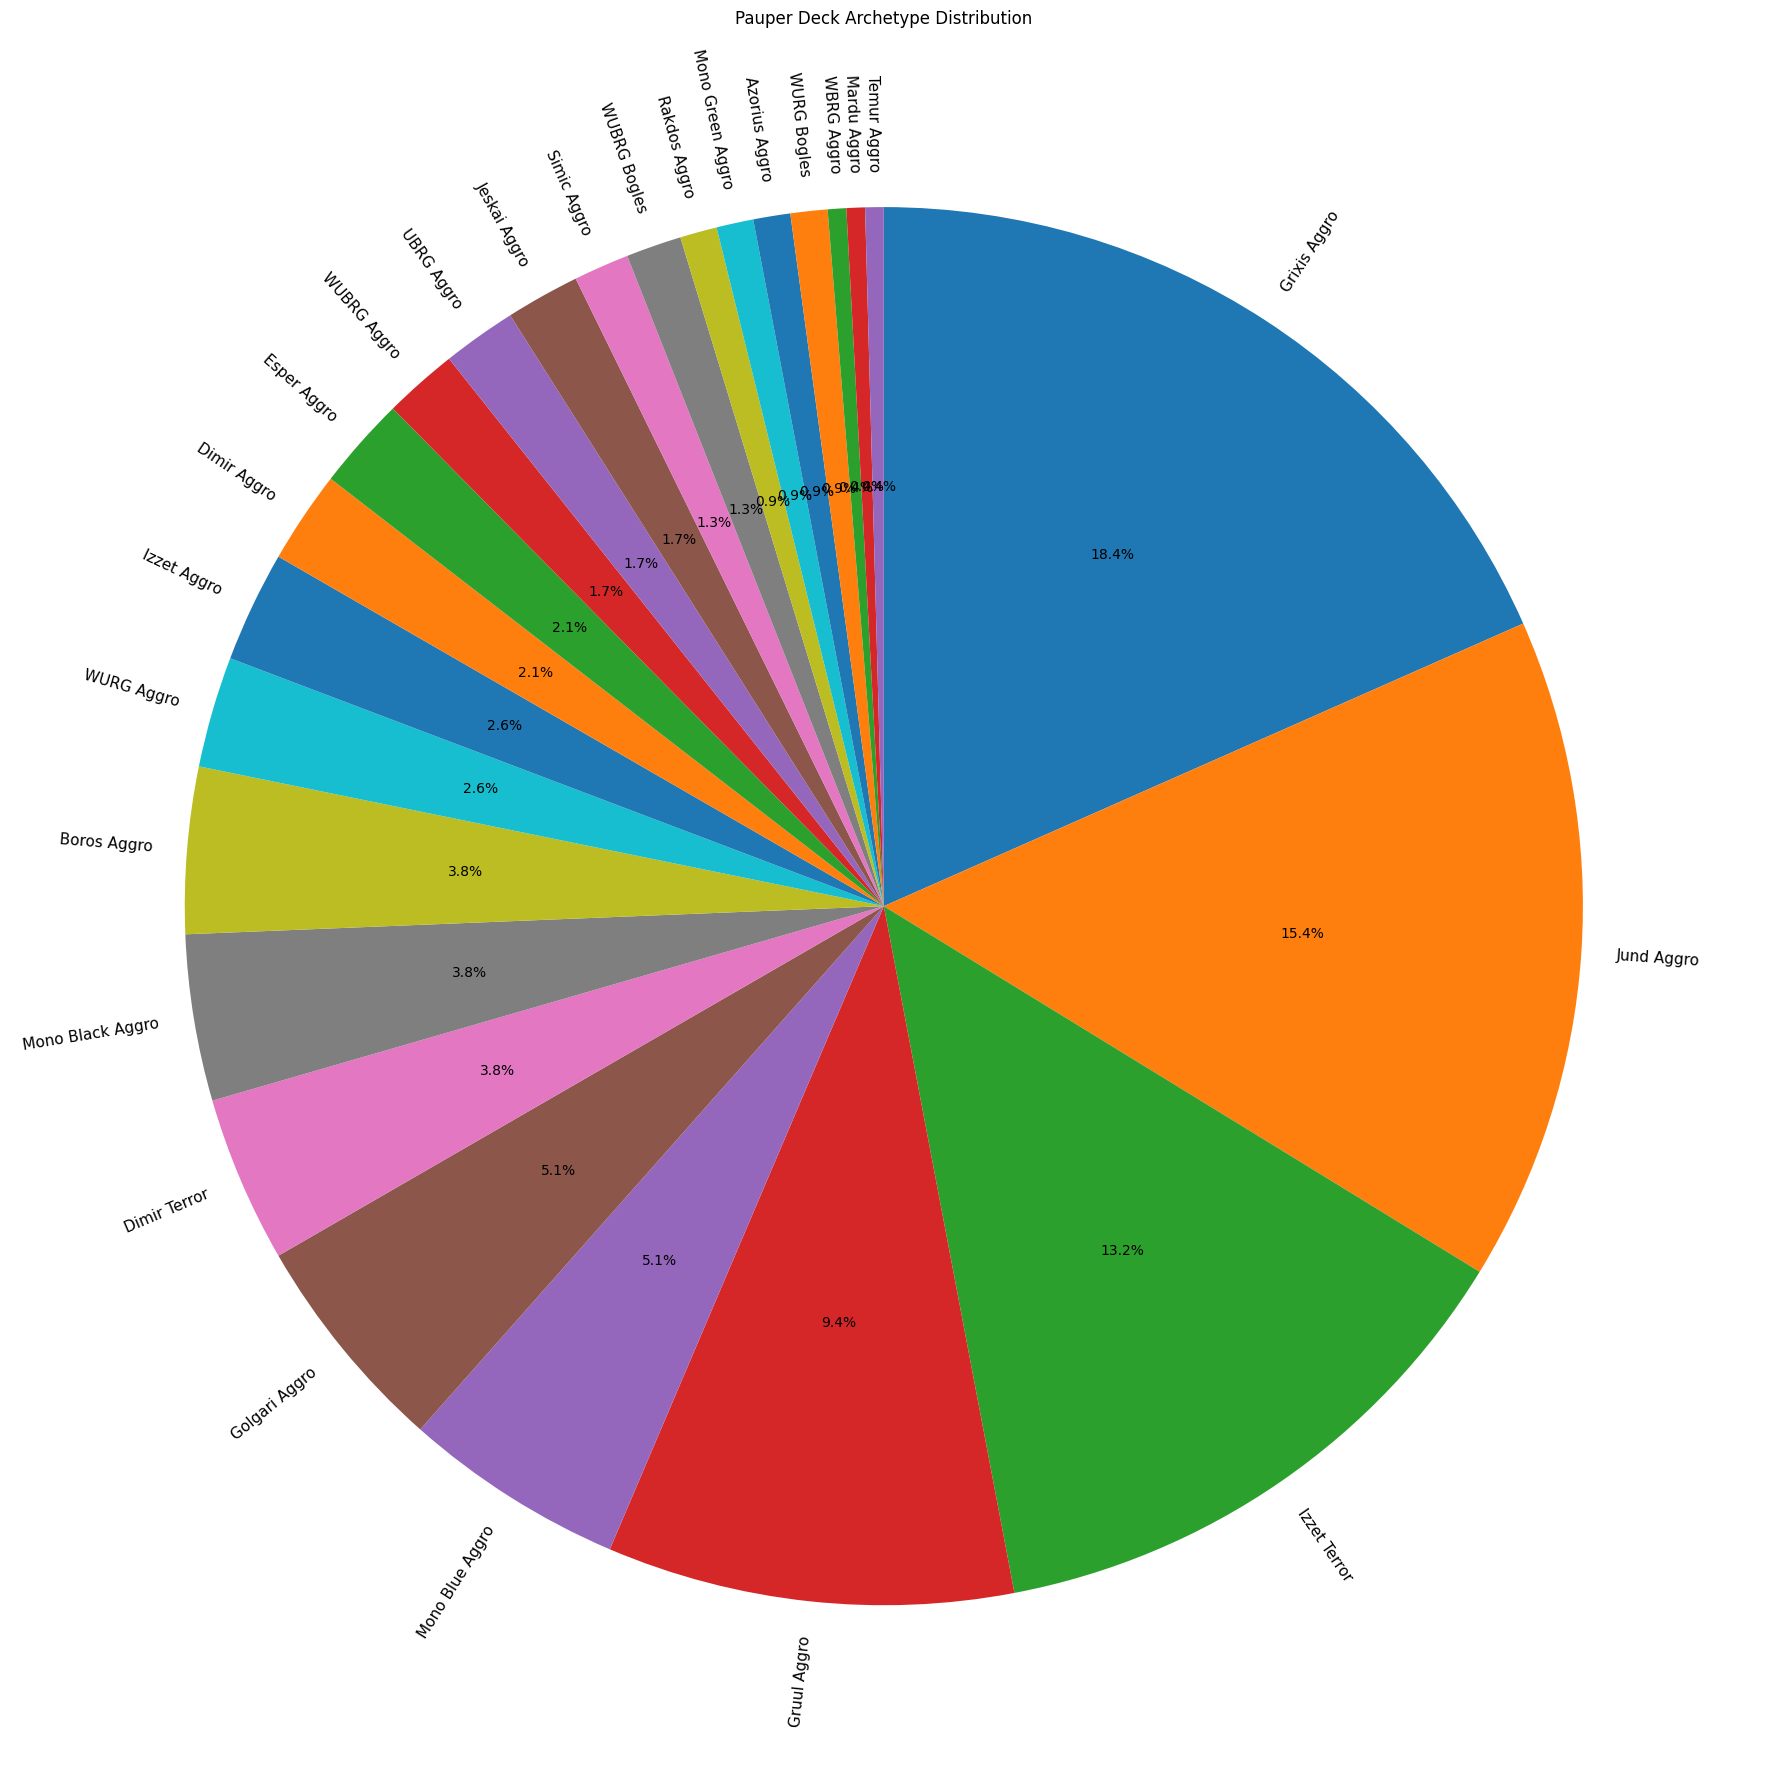

In [2]:
decks = [x.deckName for x in deckList]
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(18, 18))
wedges, _, _ = ax.pie(deck_counts, startangle=90, counterclock=False, autopct="%1.1f%%")

# Manually place labels at wedge centers
total = sum(deck_counts)
for i, wedge in enumerate(wedges):
    # Compute center angle of wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    # Position label slightly outside the wedge
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    # Flip alignment and rotation for left side
    ha = "left" if x >= 0 else "right"
    rotation = angle if x >= 0 else angle + 180

    ax.text(
        x * 1.05,
        y * 1.05,
        deck_counts.index[i],
        ha=ha,
        va="center",
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=11,
    )

plt.title(f"{queryFormat.title()} Deck Archetype Distribution")
plt.tight_layout()
plt.show()


In [3]:
keyCardNum = len([x.deckDf for x in deckList if x.keyCard == []])
print(f"{keyCardNum} deck(s) without any of the specified key cards")
show = keyCardNum
if keyCardNum > 0:
    i = 0
    x = [x for x in deckList if x.keyCard == []][i]
    print(f"{x.deckName}")
    show = x.deckDf[~x.deckDf["type_line"].str.contains("Land")]
show

189 deck(s) without any of the specified key cards
Jund Aggro


Main/Side  \
Deck URL                                         Deck               
/decklist/pauper-challenge-32-2025-08-2912812769 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Side   

                                                                     Card Name  \
Deck URL                                         Deck                            
/decklist/pauper-challenge-32-2025-08-2912812769 Deck 1            Candy Trail   
                                                 Deck 1  Eviscerator's Insight   
                                                 Deck 1         Expedition Map   
                                                 Deck 1      Malevolent Rumble   
                                                 Deck 1              Pyroblast   
                                                 Deck 1      Weather the Storm   
                                                 Deck 1        Prophetic Prism   
                                                 Deck 1        Pactdoll Terror   
                                                 Deck 1          Myr Retriever   
                                                 Deck 1         Ashnod's Altar   
                                                 Deck 1         Chromatic Star   
                                                 Deck 1        Nihil Spellbomb   
                                                 Deck 1          Golem Foundry   
                                                 Deck 1       Ichor Wellspring   
                                                 Deck 1             Last Rites   
                                                 Deck 1                 Abrade   
                                                 Deck 1           Myr Kinsmith   
                                                 Deck 1         Blood Fountain   
                                                 Deck 1          Breath Weapon   
                                                 Deck 1       Fangren Marauder   
                                                 Deck 1            Scattershot   

                                                         Quantity mana_cost  \
Deck URL                                         Deck                         
/decklist/pauper-challenge-32-2025-08-2912812769 Deck 1         4       {1}   
                                                 Deck 1         4    {1}{B}   
                                                 Deck 1         4       {1}   
                                                 Deck 1         4    {1}{G}   
                                                 Deck 1         4       {R}   
                            

In [4]:
includedCardList = []
excludedCardList = []
Queries.avgDecksWithCard(
    deckList, includedCardList, "Main", excludedCardList, "Main", "Main"
)

Card Name
Mountain              3.73
Island                3.73
Forest                1.92
Swamp                 1.61
Lightning Bolt        1.21
                      ... 
Cast into the Fire    0.00
Command Bridge        0.00
Brave the Wilds       0.00
Valakut Invoker       0.00
Acorn Harvest         0.00
Name: Quantity, Length: 421, dtype: float64

In [5]:
Queries.aggDecksWithCard(
    deckList, [], "Main", [], "Main", "Main"
)

Card Name
Mountain              873
Island                873
Forest                449
Swamp                 377
Lightning Bolt        283
                     ... 
Cast into the Fire      1
Command Bridge          1
Brave the Wilds         1
Valakut Invoker         1
Acorn Harvest           1
Name: Quantity, Length: 421, dtype: int64